# Pipeline to automate data preprocessing and model training

## Load data

In [52]:
# se carga el dataset
#df = pd.read_csv('covertype/covtype.csv')
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
data = covertype.data.original
data.info()

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [53]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [71]:
df = data.sample(frac=0.2, random_state=42)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
250728,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,1,0,0,1
246788,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,2
407714,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,2
25713,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,2
21820,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541580,3299,296,22,242,62,2184,152,227,213,2173,...,0,1,0,0,0,0,0,0,0,2
409774,2589,11,14,216,11,1064,204,210,141,2430,...,0,0,0,0,0,0,0,0,0,2
133846,2935,325,8,331,79,3042,201,232,170,2326,...,0,0,0,0,0,0,0,0,0,2
155608,2882,180,14,60,10,3209,224,248,152,2809,...,0,0,0,0,0,0,0,0,0,2


## Feature selection

In [72]:
target = 'Cover_Type'

y = df[target]
X = df.drop(columns=target)

## Train test split

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Pipeline

### Data preprocessing

In [74]:
features = X.dtypes
umbral = 10
features_categorical = [col for col in X.columns if df[col].nunique() <= umbral]
features_categorical

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [75]:

features_numerical = [col for col in df.columns if df[col].nunique() >= umbral]
features_numerical

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), features_categorical),
        ('scaler', MinMaxScaler(), features_numerical)
    ])

In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
model_t = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 20, 50],
    'min_samples_leaf': [5, 7, 9, 11],
    }

cv = GridSearchCV(model_t, param_grid)

In [78]:
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
529170,3187,244,11,457,-19,626,197,249,189,2044,...,0,0,0,0,0,0,0,0,0,0
546632,3394,117,10,323,55,1849,237,231,124,3072,...,0,0,0,0,0,0,0,1,0,0
321629,3081,220,4,362,27,2885,215,243,165,1698,...,0,1,0,0,0,0,0,0,0,0
465180,3212,22,16,524,80,2188,208,205,130,2505,...,0,0,0,0,0,0,0,0,0,0
366185,2506,203,13,162,17,1015,213,251,171,966,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511393,3143,246,23,85,24,446,166,250,216,2252,...,0,0,0,0,0,0,0,0,0,0
123005,3185,90,8,295,53,3144,232,228,129,3461,...,0,0,0,0,0,0,0,0,0,0
155516,3135,9,5,295,39,5630,215,230,153,969,...,0,0,0,0,0,0,0,0,0,0
215361,2816,46,16,247,36,1325,223,202,108,2557,...,0,0,1,0,0,0,0,0,0,0


In [79]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', cv)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['Wilderness_Area1',
                                                   'Wilderness_Area2',
                                                   'Wilderness_Area3',
                                                   'Wilderness_Area4',
                                                   'Soil_Type1', 'Soil_Type2',
                                                   'Soil_Type3', 'Soil_Type4',
                                                   'Soil_Type5', 'Soil_Type6',
                                                   'Soil_Type7', 'Soil_Type8',
                                                   'Soil_Type9', 'Soil_Type10',
                                                   'Soil_Type11', 'Soil_Type12',
                                                   'Soil_Type13', 'Soil_Type...
                                                  ['Elevation', 'Aspect',
                                                   'Slope',
                                                   'Horizontal_Distance_To_Hydrology',
                                                   'Vertical_Distance_To_Hydrology',
                                                   'Horizontal_Distance_To_Roadways',
                                                   'Hillshade_9am',
                                                   'Hillshade_Noon',
                                                   'Hillshade_3pm',
                                                   'Horizontal_Distance_To_Fire_Points'])])),
                ('model',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [5, 10, 20, 50],
                                          'min_samples_leaf': [5, 7, 9, 11]}))])

DecisionTreeClassifier()

In [80]:
pipeline.score(X_train, y_train)

0.935936366653963

In [81]:
pipeline.score(X_test,y_test)

0.8484839792318063

In [ ]:
pipeline

In [99]:
cv = pipeline[-1]

In [107]:
model = cv.best_estimator_
model

DecisionTreeClassifier(max_depth=50, min_samples_leaf=5)

In [106]:
features = pipeline[:-1].get_feature_names_out()
features

array(['onehot__Wilderness_Area1_0', 'onehot__Wilderness_Area1_1',
       'onehot__Wilderness_Area2_0', 'onehot__Wilderness_Area2_1',
       'onehot__Wilderness_Area3_0', 'onehot__Wilderness_Area3_1',
       'onehot__Wilderness_Area4_0', 'onehot__Wilderness_Area4_1',
       'onehot__Soil_Type1_0', 'onehot__Soil_Type1_1',
       'onehot__Soil_Type2_0', 'onehot__Soil_Type2_1',
       'onehot__Soil_Type3_0', 'onehot__Soil_Type3_1',
       'onehot__Soil_Type4_0', 'onehot__Soil_Type4_1',
       'onehot__Soil_Type5_0', 'onehot__Soil_Type5_1',
       'onehot__Soil_Type6_0', 'onehot__Soil_Type6_1',
       'onehot__Soil_Type7_0', 'onehot__Soil_Type7_1',
       'onehot__Soil_Type8_0', 'onehot__Soil_Type8_1',
       'onehot__Soil_Type9_0', 'onehot__Soil_Type9_1',
       'onehot__Soil_Type10_0', 'onehot__Soil_Type10_1',
       'onehot__Soil_Type11_0', 'onehot__Soil_Type11_1',
       'onehot__Soil_Type12_0', 'onehot__Soil_Type12_1',
       'onehot__Soil_Type13_0', 'onehot__Soil_Type13_1',
       'o

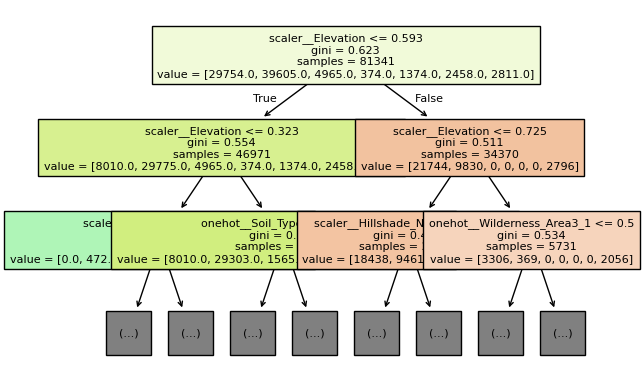

In [108]:
plot_tree(model ,max_depth= 2, fontsize=8, filled=True, feature_names=features);

In [116]:
import pandas as pd

In [125]:
s = pd.Series(dict(zip(features, model.feature_importances_))).sort_values(ascending=True)

<Axes: >

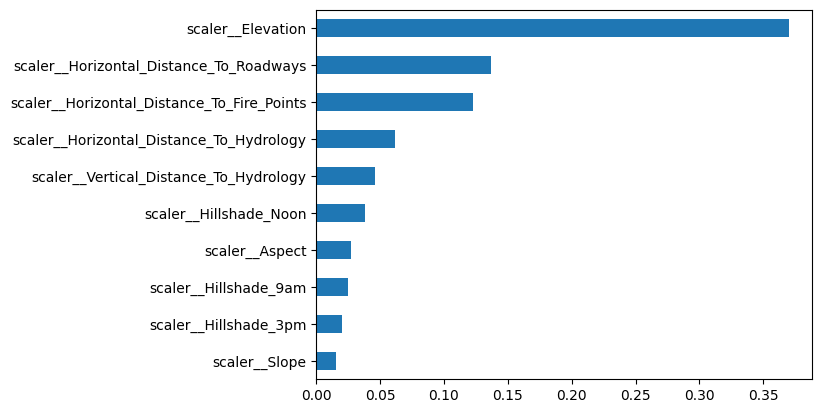

In [127]:
s[-10:].plot.barh()

In [142]:
features = ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
features = features + ['Cover_Type']

In [143]:
dfr = df[features]

In [144]:
dfr = dfr.melt(id_vars='Cover_Type')

In [145]:
dfr

,Cover_Type,variable,value
0,1,Elevation,3351
1,2,Elevation,2732
2,2,Elevation,2572
3,2,Elevation,2824
4,2,Elevation,2529
...,...,...,...
348601,2,Horizontal_Distance_To_Fire_Points,2173
348602,2,Horizontal_Distance_To_Fire_Points,2430
348603,2,Horizontal_Distance_To_Fire_Points,2326
348604,2,Horizontal_Distance_To_Fire_Points,2809


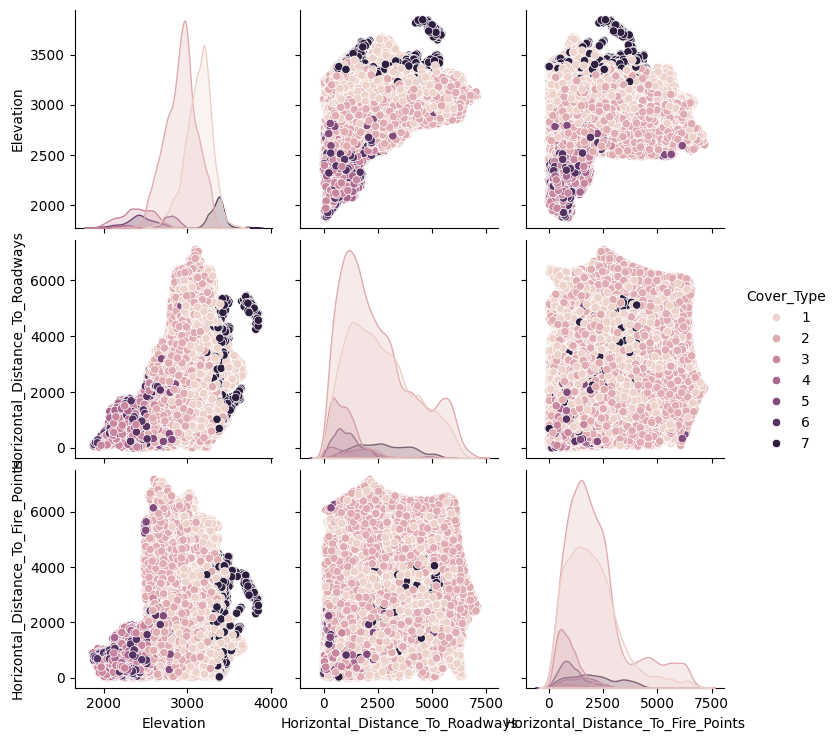

In [148]:
import seaborn as sns

sns.pairplot(df[features], hue='Cover_Type' )

In [134]:
dfr

,Elevation,Horizontal_Distance_To_Roadways,Cover_Type
250728,3351,3813,1
246788,2732,1082,2
407714,2572,957,2
25713,2824,3223,2
21820,2529,1092,2
...,...,...,...
541580,3299,2184,2
409774,2589,1064,2
133846,2935,3042,2
155608,2882,3209,2


### Model

## Alltogether

0.7101449275362319

0.8488612836438924

## Export model to use in production

In [152]:
import pickle

path = '../../artifacts/pipeline.pkl'

with open(path, 'wb') as file:
    pickle.dump(pipeline, file)